# Caltech AI & Machine Learning Bootcamp
#### Curse: CB-AIML-Core - Machine Learning
#### CB AIML JAN 2024 COHORT 2
#### Student: Eric Michel

# Course-End Project 2: Shopify Songs Classification

## Problem Scenario:
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information.


Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.

## Problem Objective:
As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to understand better the various factors that create a cohort of songs.


## Data Description
The dataset comprises information from Spotify's API regarding all albums by the Rolling Stones available on Spotify. It's crucial to highlight that each song possesses a unique ID.

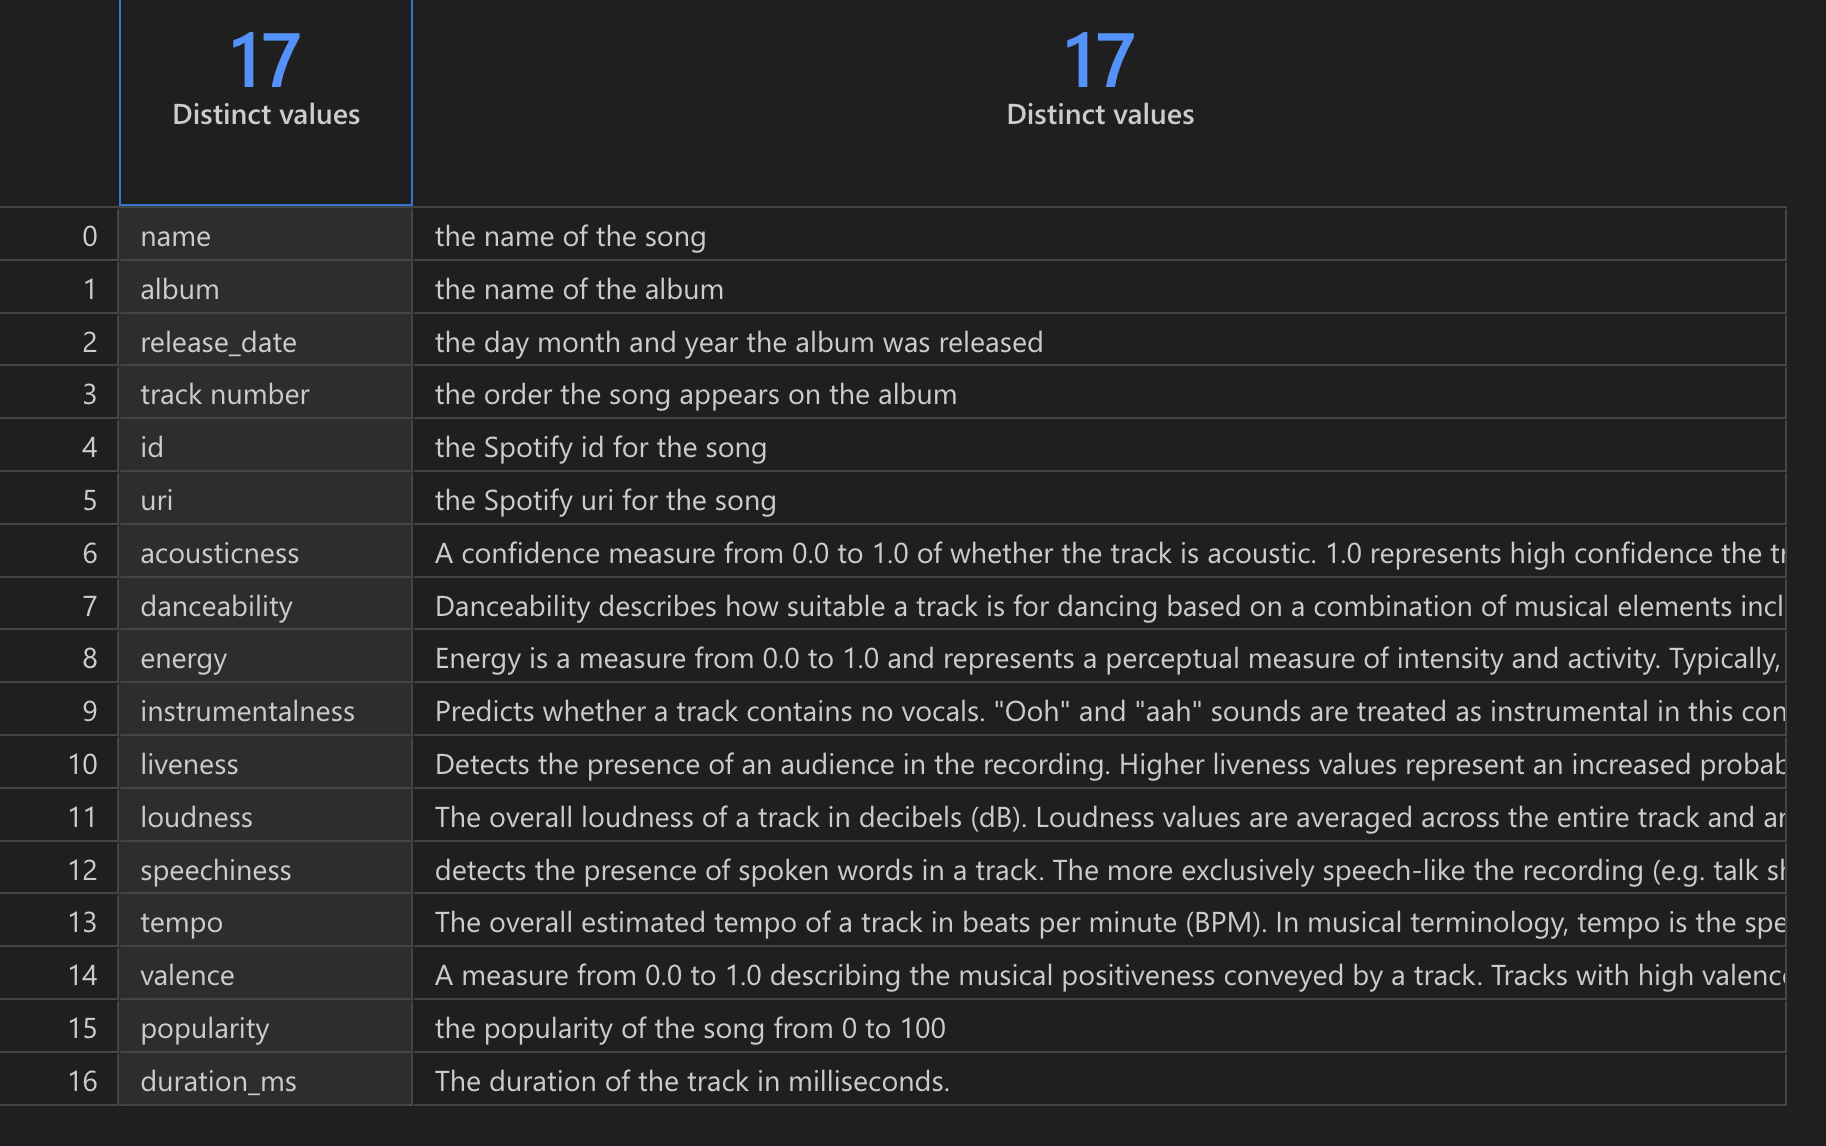

## Summary: What I did in this project


1. Initial data inspection and data cleaning
2. Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed
3. Refine the data for further processing based on your findings
4. Perform exploratory data analysis and feature engineering
5. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album
6. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns
7. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved
8. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations
9. Perform cluster analysis
10. Identify the right number of clusters
11. Use appropriate clustering algorithms
12. Define each cluster based on the features

# Initial data inspection and data cleaning

In [81]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
# Get data from Shopify Rolling Stones albums
orig_df = pd.read_csv('./rolling_stones_spotify.csv')
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [62]:
orig_df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


# Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed

In [66]:
orig_df['album'].value_counts()

album
Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Live Licks                                                   46
Tattoo You (Super Deluxe)                                    46
Some Girls (Deluxe Version)                                  44
                                                             ..
Beggars Banquet (50th Anniversary Edition)                   10
Let It Bleed (50th Anniversary Edition / Remastered 2019)     9
Black And Blue                                                8
Black And Blue (Remastered 2009)                              8
Jamming With Edward                                           6
Name: count, Length: 90, dtype: int64

In [ ]:
duplicates = orig_df['id'].value_counts()
max(duplicates)

### Delete unwanted columns

In [73]:
orig_df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [61]:
## Get desired data

# del orig_df['Unnamed: 0']
# del orig_df['track_number']
# del orig_df['id']
# del orig_df['uri']

clean_df = orig_df.iloc[:,7:]
clean_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...
1605,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [65]:
clean_df.isna().sum()

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

Observations:
- No missing data found.
- There are 90 albums in the datset.
- The first 6 columns don't seem to provide valuable information.
- No erroneous entries found.

# Refine the data for further processing based on your findings

# Perform exploratory data analysis and feature engineering

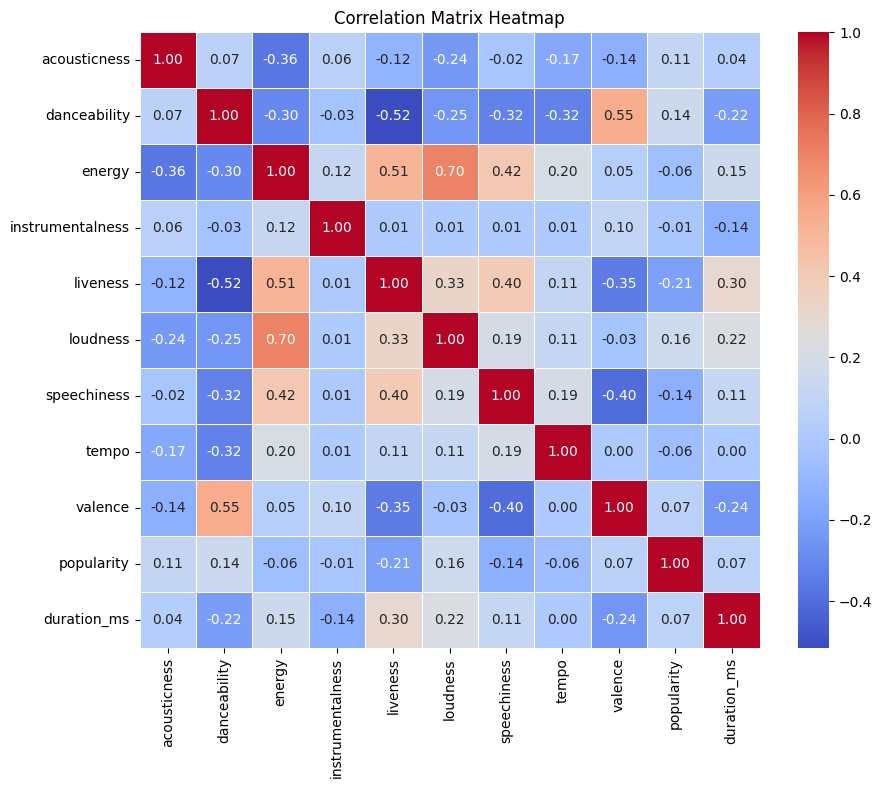

In [80]:
correlation_matrix = clean_df.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [77]:
orig_df['popularity'].sort_values(ascending=False)

1403    80
1248    76
1472    76
862     76
1257    73
        ..
1394     0
1592     0
1591     0
1590     0
546      0
Name: popularity, Length: 1610, dtype: int64

# Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

# Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

# Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

# Perform cluster analysis

# Identify the right number of clusters

# Use appropriate clustering algorithms

# Define each cluster based on the features